# Una aplicación de numpy: procesamiento de imágenes

Cada pixel puede de una imagen tiene una representación RGB, con un rango de 0-255 (int). Mientras más alto es el número, mayor «intensidad» tiene ese color en la imagen

#### Importar las librerías que usaremos

In [1]:
%matplotlib inline
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#### Importar y convertir una imagen a un ndarray

In [2]:
img = Image.open('data/imagen02.jpg')
data = np.array(img)

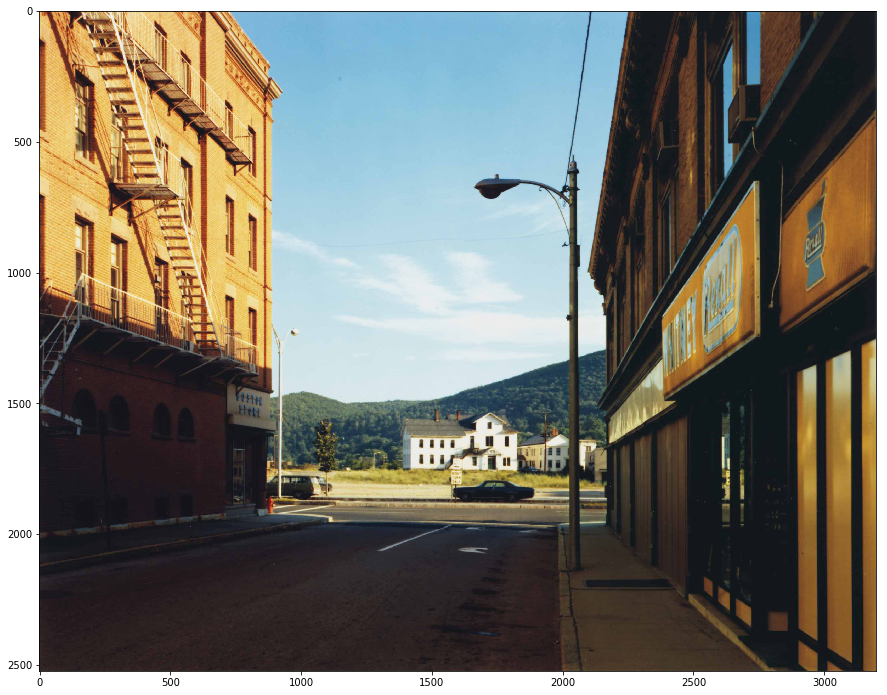

In [3]:
# Visualicemos la imagen
plt.figure(figsize=(15,15))
plt.imshow(data)

In [4]:
# Veamos la forma de la imagen
data.shape

(2523, 3200, 3)

Los primeros dos números se refieren al tamaño de la imagen (height, width), mientras que la tercera se refiere al número de capas que tiene. En este caso, la imagen tiene tres capas (rojo, verde, azul) RGB.

In [5]:
print(f'El valor mínimo de la imagen es {data.min()}')
print(f'El valor máximo de la imagen es {data.max()}')
print(f'Valor medio de la imagen: {data.mean()}')

El valor mínimo de la imagen es 0
El valor máximo de la imagen es 255
Valor medio de la imagen: 100.74780932091426


In [6]:
print(f'EL valor RGB en la posición 100,200 es {data[100,200, :]}')

EL valor RGB en la posición 100,200 es [92 43 26]


In [7]:
data[100,200,0]

92

#### Cambiar el valor de un pixel particular

In [8]:
data[100, 200] = 0 # No se va a apreciar en la visualización porque es muy pequeño

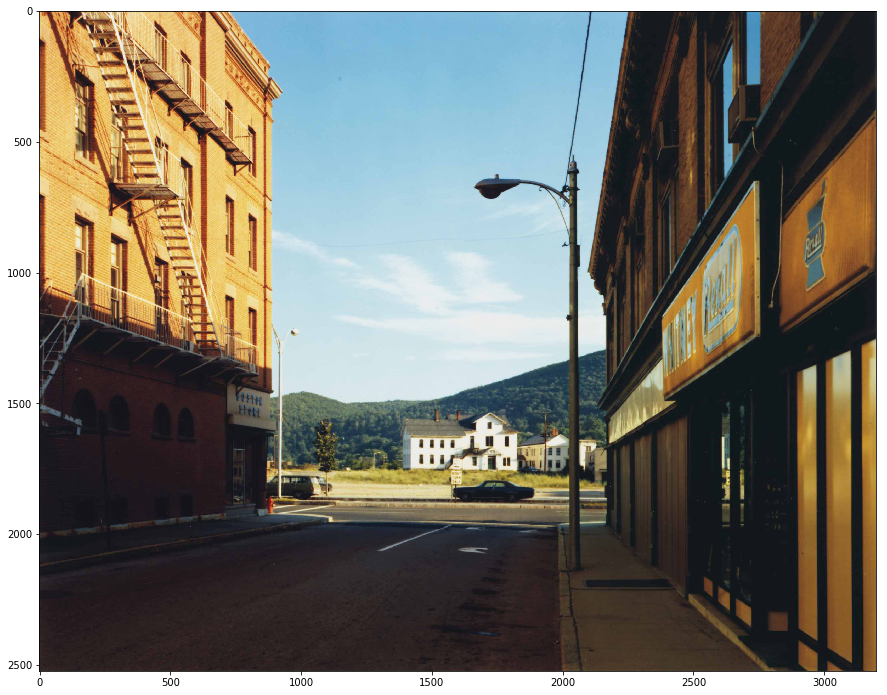

In [9]:
# Visualicemos la imagen
plt.figure(figsize=(15,15))
plt.imshow(data)

#### Cambiar el color de una región

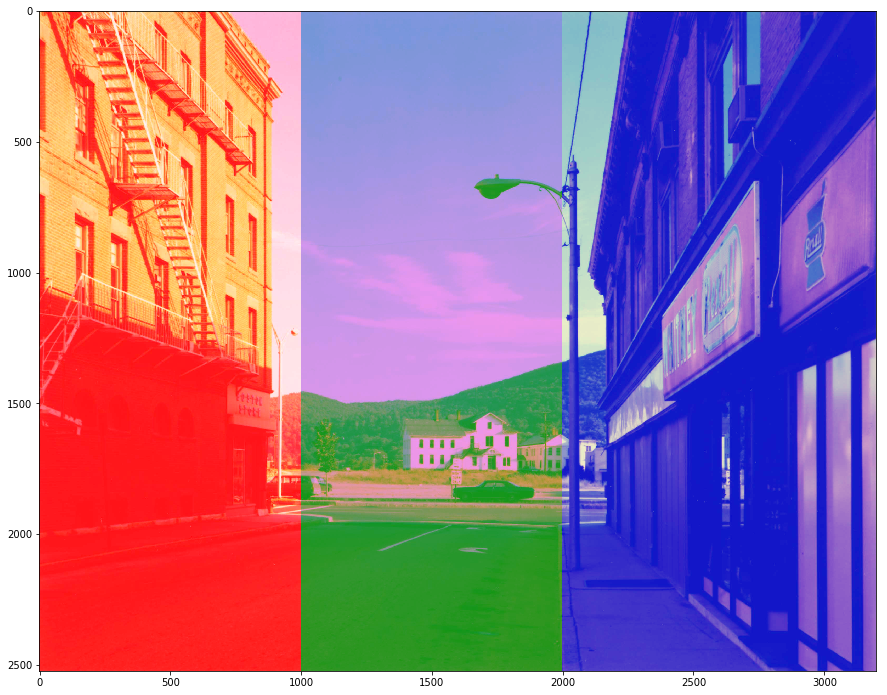

In [10]:
data_ = np.array(data)
# Hacemos que todos los valores que correspondan al eje de las Ys, que estén entre 0 y 1000 en el eje de las Xs,
# y que correspondan al primer layer (rojo) sean igual a 255 (es decir, que tengan una máxima intensidad de rojo)
data_[:, 0:1000, 0] = 255
# Hacemos que todos los valores que correspondan al eje de las Ys, que estén entre 1000 y 2000 en el eje de las Xs,
# y que correspondan al segundo layer (verde) sean igual a 150 
data_[:, 1000:2000, 1] = 150 
# Hacemos que todos los valores que correspondan al eje de las Ys, que sean mayores que 2000 en el eje de las Xs,
# y que correspondan al tercer layer (azul) sean igual a 200
data_[:, 2000:, 2] = 200

# Visualicemos la imagen
plt.figure(figsize=(15,15))
plt.imshow(data_)

#### Cambiar los valores usando filtros booleanos

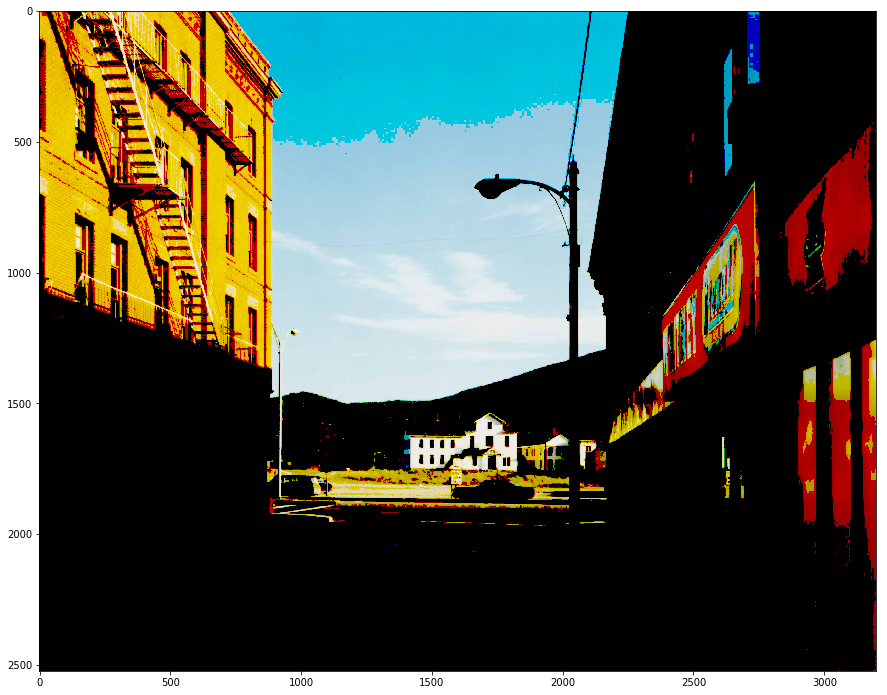

In [11]:
# ¿Cómo le haríamos para que todos los pixeles oscuros de la imagen (R<100, G<100, B<100)
# se conviertan a completamente negros (R=0, G=0, B=0)? 
data_ = np.array(data)
filter = data_ < 150
data_[filter] = 0

# Visualicemos la imagen
plt.figure(figsize=(15,15))
plt.imshow(data_)

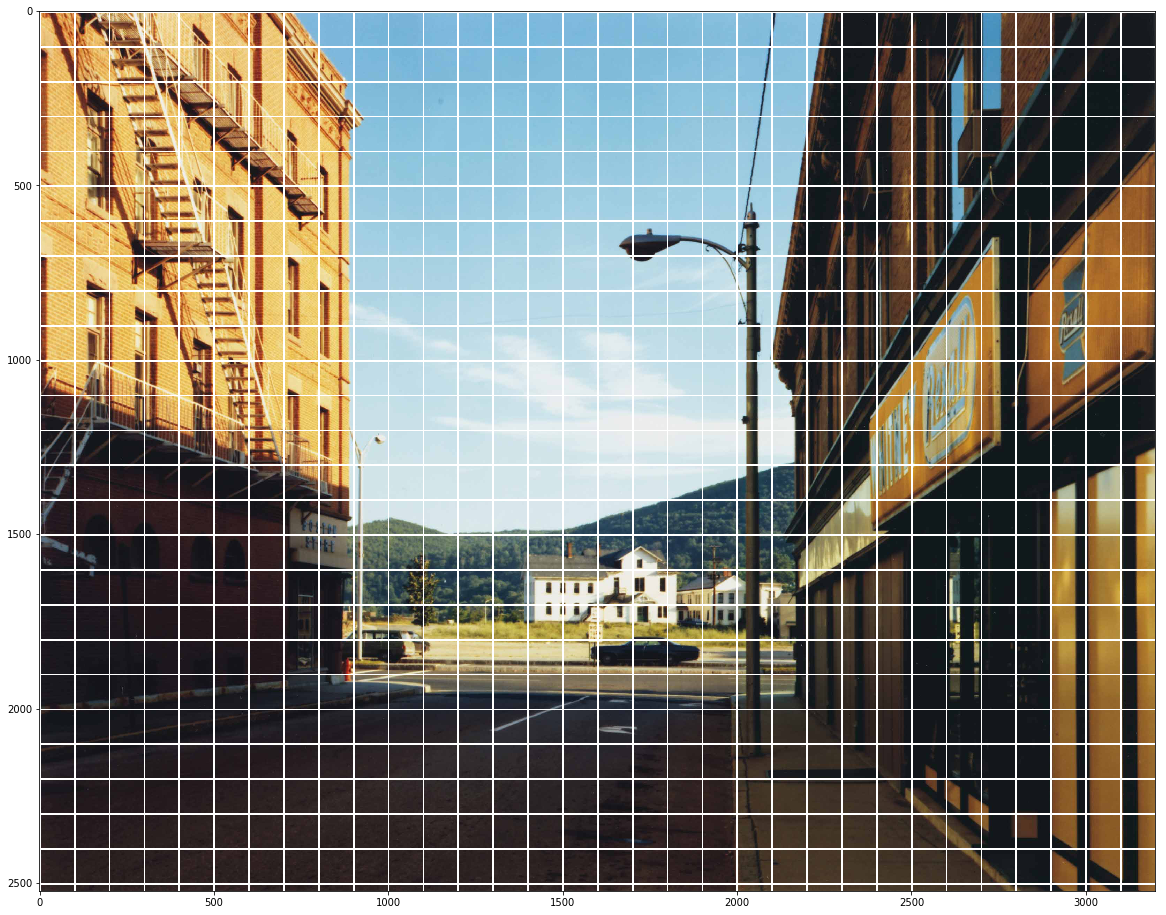

In [16]:
## ¿Cómo dibujaríamos un grid con cuadrados blancos (R=255, G=255, B=255) de 100x100 en la imagen?
# Para que sea visible, hagamos que las líneas del grid tengan 5 pixeles de grosor
data_ = np.array(data)
for y in range(0, data_.shape[0], 100):
    data_[y:y+5, :, :] = 255
for x in range(0, data_.shape[1], 100):
    data_[:, x:x+5, :] = 255


# Visualicemos la imagen
plt.figure(figsize=(20,20))
plt.imshow(data_)

### Ejercicio

1. Crear una nueva imagen cuadrada de 2500x2500 pixeles 
2. Trazar un cuadrado rojo con centro en (y=1500, x=2000), cuyos lados midan 1000 pixeles

(2523, 3200, 3)

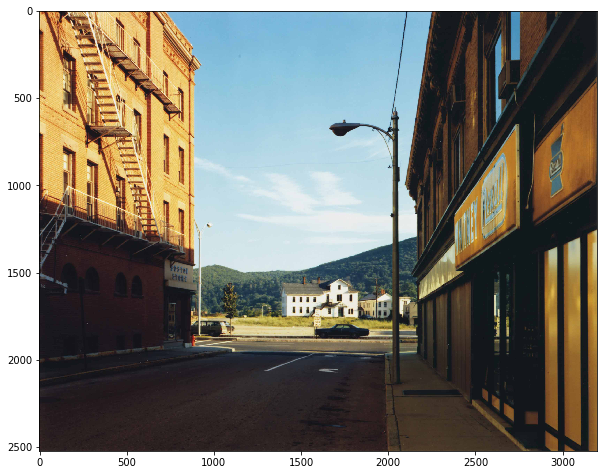

In [18]:
img = Image.open('data/imagen02.jpg')
data = np.array(img)

# Primero visualicemos la imagen
plt.figure(figsize=(10,10))
plt.imshow(data)
data.shape

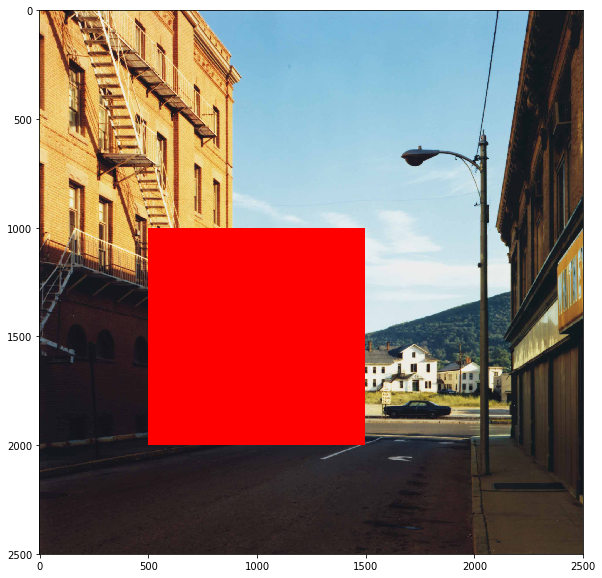

In [19]:
# 1. Crear una nueva imagen cuadrada de 2500x2500. En este caso, conviene hacerlo por medio de una copia
data_ = np.array(data[0:2500, 0:2500, :])

# 2. Trazar un cuadrado rojo con centro en (y=1500, x=1000), cuyos lados midan 1000 pixeles
data_[(1500-500):(1500+500), (1000-500):(1000+500), 0] = 255
data_[(1500-500):(1500+500), (1000-500):(1000+500), 1] = 0
data_[(1500-500):(1500+500), (1000-500):(1000+500), 2] = 0

# Visualicemos la imagen
plt.figure(figsize=(10,10))
plt.imshow(data_)

#### Combinar dos imágenes

In [20]:
# Importamos las imágenes y las convertimos a arrays de numpy
img1 = np.array(Image.open('data/imagen01.jpg'))
img2 = np.array(Image.open('data/imagen02.jpg'))
print(img1.shape)
print(img2.shape, '\n')

# Convertimos las imágenes para que sean del mismo tamaño (como la imagen 2 es más grande en ambos ejes, hay que recortarlaÇ)
img2 = img2[0:img1.shape[0], 0:img1.shape[1], :]
print(img1.shape)
print(img2.shape)

(1536, 1276, 3)
(2523, 3200, 3) 

(1536, 1276, 3)
(1536, 1276, 3)


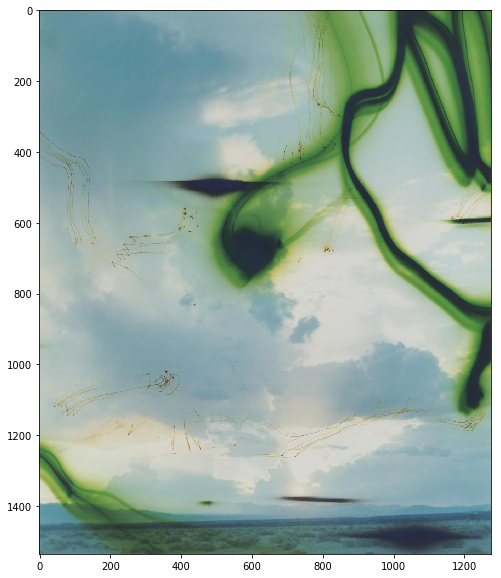

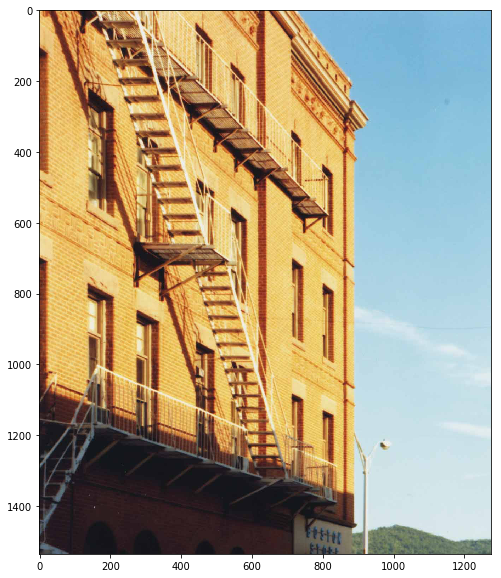

In [21]:
# Visualicemos las imágenes
plt.figure(figsize=(10,10))
plt.imshow(img1)

plt.figure(figsize=(10,10))
plt.imshow(img2)

In [22]:
# Definimos una alfa para hacer la suma ponderada de los valores
alpha = 0.6
img3 = (img1 * alpha) + (img2 * (1-alpha))
print(img3.dtype)
# Hay que cambiar el tipo de dato de img3 para que pueda ser representable como una imagen
img3 = img3.astype(int)
print(img3.dtype)

float64
int64


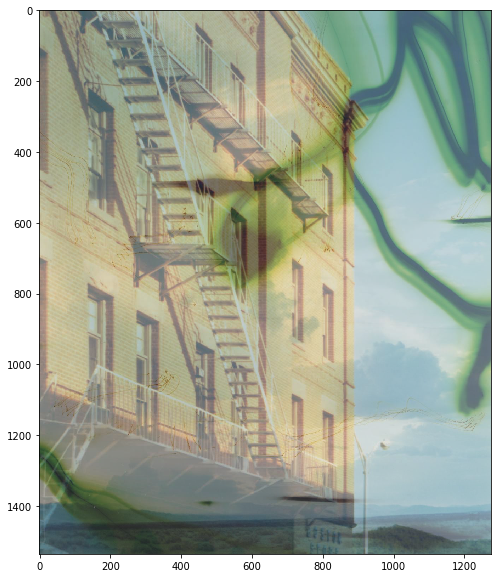

In [23]:
# Visualicemos la imagen final
plt.figure(figsize=(10,10))
plt.imshow(img3)